# K-means clustering

In this assignment you will implement the K-means clustering algorithm using the Iris dataset. 

Before anything else, let's summarize what we need to get started:
* A dataset with multiple examples (datapoints) and at least one feature with continuous values.
* The max and min values of each feature to generate random initial K-points.
* A uniform distribution for each dimension.
* Define how many K-points you will use (How can you know this?).
* Define how you will know that you have reached “convergence”.

Let's go through these points.

In [20]:
# importing all the necessary libraries
import random 
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits import mplot3d
from sklearn import datasets
%matplotlib inline

iris = datasets.load_iris() 
X = iris.data
y = iris.target
names = iris.feature_names

begin_X_index = 0
end_X_index = 2

# function for assigning X value again and avoid copypasting 
def get_X_data(): 
  X = iris.data 
  X = X[:, begin_X_index: end_X_index]  
  return X

def name_axis(): 
  plt.xlabel(names[begin_X_index])
  plt.ylabel(names[end_X_index - 1])

X = get_X_data()

In [21]:
# challenge: can you write this with a for loop?
# - challenge accepted 
def get_min_max(arr):
  min = max = arr[0]
  for i in arr[1:]:
    if i < min: 
      min = i 
    else: 
      if i > max: 
        max = i
  return (min, max)
x0_min_max = get_min_max(X[:, 0])
x1_min_max = get_min_max(X[:, 1])

In [22]:
num_K_points = 3

In [23]:
# challenge: How will you define that you have reached convergence?
# - challenge accepted(kinda)

# strangely, this code doesn't work as a function
# I mean it works, but it runs only one time 
# I think it would work in Swift
# as you said, python is weird
# it has problems identifying which variables are global and which are not, 
# so you kinda have to pass some arguments manually 
# and it creates strange problems 
# "Swift is better than python" - change my mind XD 
# sorry for comments spam

# def reaching_convergence(old_K_points, K_points): 
#   current_loop = 0
#   k_points = K_points
#   old_k_points = old_K_points
#   while old_k_points != k_points:
#     old_k_points = k_points
#     closest_k_point = []
#     distances = []
#     second_step(closest_k_point, distances)
#     K_points = third_step(k_points)
#     visualize_kPoints_data() 
#     current_loop += 1 
#     if current_loop == 10:
#       break 
#   return k_points 

Ok, we have everything we need to get started writing the algorithm. Let's remember the algorithm steps:
1. Generate K points by drawing numbers from a uniform distribution for each feature (use the max and min values to delimit the uniform distribution). 
2. Calculate which of the K point is closest to each of the datapoints. This will define K regions in your dataset.
3. Calculate the mean for the datapoints in each of the K regions. The new K means will be your new K points. 
4. Repeat steps 2 and 3 until achieving convergence.

Let's write the K-means clustering algorithm:

In [24]:
# step 1 
K_points = [] 
def first_step(): 
  for i in range(num_K_points):
    rand1 = random.uniform(x0_min_max[0], x0_min_max[1])
    rand2 = random.uniform(x1_min_max[0], x1_min_max[1])
    K_points.append([rand1, rand2])
first_step() 

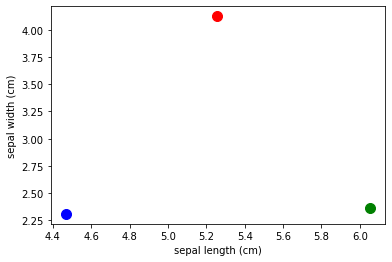

In [25]:
# - function for data visualization 
main_colors = ['red', 'blue', 'g']
colors = ['pink','c','yellowgreen']
def visualize_kPoints_data(): 
  for i in range(num_K_points):
    plt.scatter(K_points[i][0], K_points[i][1], c = main_colors[i], s = 100)
  plt.show()

name_axis()
visualize_kPoints_data()

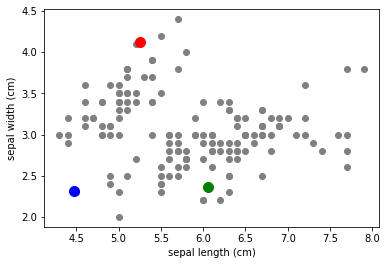

In [26]:
plt.scatter(X[:, 0], X[:, 1], c = 'gray')
name_axis()
visualize_kPoints_data()

# Do the K-points seem to be the mean of the clusters that your datapoints form?
# - no 

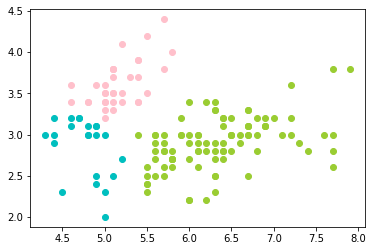

In [27]:
def L1_norm(a, b):
  norm = 0 
  for i in range(len(a)):
    norm += abs(a[i] - b[i])
    
  return norm

def L2_norm(a, b):
  sum = 0 
  for i in range(2): 
    sum += pow((a[i] - b[i]), 2)
  return np.sqrt(sum)

Ndatapoints = len(X)
closest_k_point = []
distances = []

def second_step(closest_k_point, distances): 
  for i in range(Ndatapoints):
    norms = []
    for ii in range(num_K_points):
      norms.append(L2_norm(X[i], K_points[ii]))
      # norms.append(L1_norm(X[i], K_points[ii]))
    distances.append(norms)  

  # I combined finding closest point and plot scattering
  for i in range(Ndatapoints):
    min_distance = get_min_max(distances[i])[0]
    index = distances[i].index(min_distance)
    closest_k_point.append(index)

    plt.scatter(X[i, 0], X[i, 1], c = colors[closest_k_point[i]])

second_step(closest_k_point, distances)
plt.show()

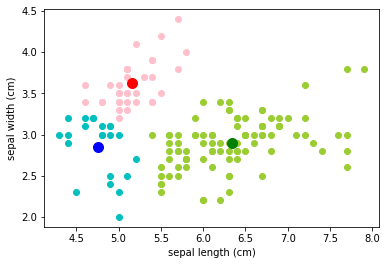

In [28]:
def cluster_mean(cluster):
  mean = [0, 0]
  sum0 = 0 
  sum1 = 0 
  for i in range(len(cluster)):
    sum0 += cluster[i][0]
    sum1 += cluster[i][1]
  
  mean[0] = round(sum0 / len(cluster), 2)
  mean[1] = round(sum1 / len(cluster), 2)
        
  return mean
 
def third_step(K_points): 
  clusters = [[],[],[]]   

  for i in range(Ndatapoints):
    cindex = 2
    if closest_k_point[i] == 0:
      cindex = 0 
    elif closest_k_point[i] == 1:
      cindex = 1 
    clusters[cindex].append([X[i][0], X[i][1]])

  mean0 = cluster_mean(clusters[0])
  mean1 = cluster_mean(clusters[1])
  mean2 = cluster_mean(clusters[2])

  means = [mean0, mean1, mean2]

  for i in range(Ndatapoints):
    plt.scatter(X[i, 0], X[i, 1], c = colors[closest_k_point[i]])

  return means

K_points = third_step(K_points)
name_axis()
visualize_kPoints_data() 

Now that you have written the three steps, you can repeat steps 2 and 3 until your algorithm converges. 

You can write a while loop to automate the repetition of the steps. How will you know when to stop the while loop?

ran the loop 13 times


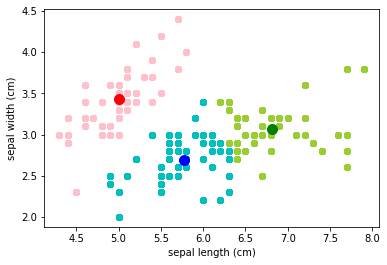

In [29]:
old_K_points = [0, 0, 0]
current_loop = 0 
# reaching_convergence(old_K_points, K_points)
while old_K_points != K_points:
  old_K_points = K_points
  closest_k_point = []
  distances = []
  second_step(closest_k_point, distances)
  K_points = third_step(K_points)
  current_loop += 1 

print("ran the loop", current_loop, "times")
name_axis()
visualize_kPoints_data() 

In [30]:
# Now write code to visualize a comparison between the clusters that you found and the ground truth

def check_accuracy(closest_k_point): 
  correct_answers = 0 
  incorrect_answers = 0 
  for i in range(len(y)):
    if closest_k_point[i] == y[i]: 
      correct_answers += 1
    else:
      incorrect_answers += 1
  print(correct_answers, "correct answers")
  print(incorrect_answers, "incorrect answers")
check_accuracy(closest_k_point)

# one time I got 142 correct answers !
# but sometimes proportions are bizarre 
# so you can run the previous cell for more accurate results

123 correct answers
27 incorrect answers


Once you are done, try the following:
* Use the L2 norm instead of L1 norm
* Use another set of 2 features from the Iris dataset
* Use more than two features. Start using 3 features and generate 3D plots
* Can you do this with all 4 features? What if you do it only with 1 feature?
* How do you get the best result?

In [31]:
# Use the L2 norm instead of L1 norm
# algorithm already works using L2 norm(L1 norm getting function is commented)

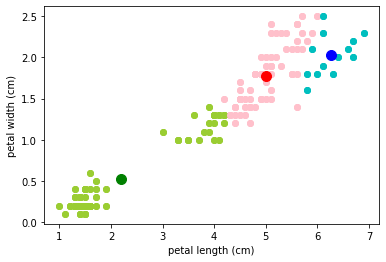

ran the loop 8 times


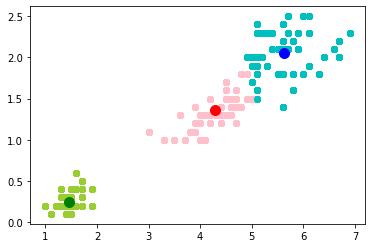

2 correct answers
148 incorrect answers


In [32]:
# Use another set of 2 features from the Iris dataset
begin_X_index = 2
end_X_index = 4
X = get_X_data()
name_axis()
x0_min_max = get_min_max(X[:, 0])
x1_min_max = get_min_max(X[:, 1])
K_points = []
first_step() 
closest_k_point = []
distances = []
second_step(closest_k_point, distances)
K_points = third_step(K_points)
visualize_kPoints_data() 

# sorry for copypasta
old_K_points = [0, 0, 0]

current_loop = 0
while old_K_points != K_points:
  old_K_points = K_points
  closest_k_point = []
  distances = []
  second_step(closest_k_point, distances)
  K_points = third_step(K_points)
  current_loop += 1 

print("ran the loop", current_loop, "times")
visualize_kPoints_data() 

# for better accuracy in this case you should run cell twice(but not more)
check_accuracy(closest_k_point)

65 correct answers
85 incorrect answers


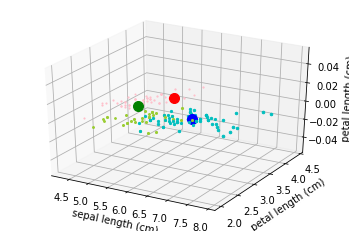

In [37]:
# Use more than two features. Start using 3 features and generate 3D plots

fig = plt.figure()
ax = plt.axes(projection = '3d')
ax.set_zlabel(names[2])

begin_X_index = 0
end_X_index = 3
X = get_X_data()
name_axis()
Ndatapoints = len(X)

x0_min_max = get_min_max(X[:, 0])
x1_min_max = get_min_max(X[:, 1])
x2_min_max = get_min_max(X[:, 2])
K_points = []

# added rand3 
def threeD_first_step(): 
  for i in range(num_K_points):
    rand1 = random.uniform(x0_min_max[0], x0_min_max[1])
    rand2 = random.uniform(x1_min_max[0], x1_min_max[1])
    rand3 = random.uniform(x2_min_max[0], x2_min_max[1])
    K_points.append([rand1, rand2, rand3])
threeD_first_step() 

closest_k_point = []
distances = []

def threeD_L2_norm(a, b):
  sum = 0 
  for i in range(3): 
    sum += pow((a[i] - b[i]), 2)
  return np.sqrt(sum)

# everything the same besides scattering and l2
def threeD_second_step(closest_k_point, distances): 
  for i in range(Ndatapoints):
    norms = []
    for ii in range(num_K_points):
      norms.append(threeD_L2_norm(X[i], K_points[ii]))
    distances.append(norms)  

  # I combined finding closest point and plot scattering
  for i in range(Ndatapoints):
    min_distance = get_min_max(distances[i])[0]
    index = distances[i].index(min_distance)
    closest_k_point.append(index)

  #   plt.scatter(X[i, 0], X[i, 1], X[i, 2], c = colors[closest_k_point[i]])
threeD_second_step(closest_k_point, distances)

def threeD_cluster_mean(cluster):
  mean = [0, 0, 0]
  sum0 = 0 
  sum1 = 0 
  sum2 = 0 
  for i in range(len(cluster)):
    sum0 += cluster[i][0]
    sum1 += cluster[i][1]
    sum2 += cluster[i][1]
  
  mean[0] = round(sum0 / len(cluster), 2)
  mean[1] = round(sum1 / len(cluster), 2)
  mean[2] = round(sum2 / len(cluster), 2)
  return mean


def threeD_third_step(K_points): 
  clusters = [[],[],[]]   

  for i in range(Ndatapoints):
    cindex = 2  
    if closest_k_point[i] == 0:
      cindex = 0
    elif closest_k_point[i] == 1:
      cindex = 1 
    clusters[cindex].append([X[i][0], X[i][1], X[i][2]])

  mean0 = threeD_cluster_mean(clusters[0])
  mean1 = threeD_cluster_mean(clusters[1])
  mean2 = threeD_cluster_mean(clusters[2])

  means = [mean0, mean1, mean2]

  for i in range(Ndatapoints):
    plt.scatter(X[i, 0], X[i, 1], X[i, 2], c = colors[closest_k_point[i]])

  return means

k_Points = threeD_third_step(K_points)
check_accuracy(closest_k_point)

# ideally, this code should work, but it doesn't 
# there are weird bug with values 
# therefore it returns errors like 'can't divide by 0'

# sorry for copypasta x2 
# old_K_points = [0, 0, 0]
# current_loop = 0
# while old_K_points != K_points:
#   old_K_points = K_points
#   closest_k_point = []
#   distances = []
#   threeD_second_step(closest_k_point, distances)
#   K_points = threeD_third_step(K_points)
#   current_loop += 1 
# print("ran the loop", current_loop, "times")

visualize_kPoints_data() 
plt.show()

It is possible to do this with all 4 features, but it will be impossible to present it as a graph, so we should use heat map or table instead. If we do it with 1 feature - we can present it as a constant horizontal line. 

The best results is achievable by using 4 features. 